In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.svm import SVR
from math import sqrt
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [5]:
import operator
import statsmodels.api as sm
from numpy import polyfit
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
scaled_df = pd.read_csv('datapreprocessing-output.csv')

In [7]:
scaled_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,10,3,65.0,8450,1,1,3,3,4,...,0,3,4,1,0,4,2,8,4,208500.0
1,2,5,3,80.0,9600,1,1,3,3,2,...,0,3,4,1,0,7,1,8,4,181500.0
2,3,10,3,68.0,11250,1,1,0,3,4,...,0,3,4,1,0,11,2,8,4,223500.0
3,4,11,3,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,4,0,8,0,140000.0
4,5,10,3,84.0,14260,1,1,0,3,2,...,0,3,4,1,0,3,2,8,4,250000.0


In [8]:
scaled_df.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,7.134293,3.027749,69.542994,10168.114080,0.995889,0.985612,1.947585,2.776978,3.055841,...,2.251799,2.993148,3.493662,1.065776,50.825968,6.508736,1.792737,7.491264,3.779034,180921.195890
std,842.787043,3.698608,0.658355,21.703256,7886.996359,0.063996,0.260092,1.409721,0.704391,1.604472,...,35.663946,0.128073,1.091376,0.363410,567.402211,2.986807,1.314964,1.593502,1.078241,79442.502883
min,1.000000,0.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,730.500000,5.000000,3.000000,60.000000,7478.000000,1.000000,1.000000,0.000000,3.000000,2.000000,...,0.000000,3.000000,4.000000,1.000000,0.000000,5.000000,1.000000,8.000000,4.000000,129975.000000
50%,1460.000000,5.000000,3.000000,70.000000,9453.000000,1.000000,1.000000,3.000000,3.000000,4.000000,...,0.000000,3.000000,4.000000,1.000000,0.000000,7.000000,2.000000,8.000000,4.000000,163000.000000
75%,2189.500000,10.000000,3.000000,80.000000,11570.000000,1.000000,1.000000,3.000000,3.000000,4.000000,...,0.000000,3.000000,4.000000,1.000000,0.000000,9.000000,3.000000,8.000000,4.000000,214000.000000
max,2919.000000,15.000000,4.000000,313.000000,215245.000000,1.000000,2.000000,3.000000,3.000000,4.000000,...,800.000000,3.000000,4.000000,4.000000,17000.000000,11.000000,4.000000,8.000000,5.000000,755000.000000


In [9]:
scaled_df.fillna(0, inplace=True)

Now that the data is preprocessed and scaled, we can build a model using it.

# Model Building

Model - 1 : Polynomial Regression can be used to predict the Output Target Variable

In [108]:
X2 = scaled_df[scaled_df.SalePrice != 0]
y2 = scaled_df.SalePrice[scaled_df.SalePrice != 0]

In [109]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=1/3,random_state=42)

In [110]:
X2_train.drop(columns=['Id'], axis=1)
X2_test.drop(columns=['Id'], axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
892,5,3,70.0,8414,1,1,3,3,4,0,...,0,3,2,1,0,4,0,8,4,154500.0
1105,10,3,98.0,12256,1,1,0,3,0,0,...,0,3,4,1,0,6,4,8,4,325000.0
413,6,4,56.0,8960,1,0,3,3,4,0,...,0,3,4,1,0,5,4,8,4,115000.0
522,9,4,50.0,5000,1,1,3,3,0,0,...,0,3,4,1,0,1,0,8,4,159000.0
1036,5,3,89.0,12898,1,1,0,1,4,0,...,0,3,4,1,0,11,3,8,4,315500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,14,3,80.0,8800,1,1,3,3,4,0,...,0,3,2,1,0,7,4,8,0,137500.0
613,5,3,70.0,8402,1,1,3,3,4,0,...,0,3,4,1,0,3,1,6,5,147000.0
1303,5,3,73.0,8688,1,1,3,3,4,0,...,0,3,4,1,0,6,0,8,4,232000.0
486,5,3,79.0,10289,1,1,3,3,4,0,...,0,3,4,1,0,8,1,8,4,156000.0


In [111]:
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression(fit_intercept = False))
model.fit(X2_train,y2_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [112]:
y2_pred = model.predict(X2_test)

In [115]:
print('Mean Absolute Error for the model is', mean_absolute_error(y2_test, y2_pred))
print('Explained Variance Score (R-square) for the model is', explained_variance_score(y2_test, y2_pred))

Mean Absolute Error for the model is 647.8771320814778
Explained Variance Score (R-square) for the model is 0.9858837005213255


In [116]:
y2_test = np.array(y2_test)
y2_test.flatten()
y2_pred = np.array(y2_pred)
y2_pred.flatten()

array([154500.07214198, 325000.0051497 , 115000.34038086, 158999.87673485,
       315499.93724623,  75501.16816055, 311498.6535857 , 145999.97559741,
        84499.51301819, 135500.18858128, 144999.8228178 , 129998.38915038,
        80984.99903864, 214000.05291479, 180999.82716549, 134499.87045362,
       183499.99715539, 135000.02063476, 118400.20900368, 226000.06398594,
       154999.75001753, 209999.86445411, 173499.98942035, 129000.52998907,
       191999.90223751, 153900.00018467, 181134.00548983, 141000.49731048,
       181000.05508415, 208899.76623337, 126999.59826917, 283999.89461664,
       201044.45693165, 135749.97411256, 255000.08512083, 140000.13399043,
       137999.09700859, 219500.08843398, 309999.94760907,  97000.20358407,
       114443.83198591, 204999.78643342, 119498.86567427, 253292.60472232,
       128500.08278247, 117499.98962224, 114999.2315451 , 127000.09664576,
       451949.62647786, 144001.08925468, 118999.85500318, 195999.87489263,
       114999.82904365, 2

In [117]:
df_linefit = pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred})

In [118]:
df_linefit.head()

,Actual,Predicted
0,154500.0,154500.072142
1,325000.0,325000.005150
2,115000.0,115000.340381
3,159000.0,158999.876735
4,315500.0,315499.937246


We can observe from Mean Absolute Error and Explained Variance Score that the model has overfitting issues. So the next 
crucial step would be Regularization of the model to introduce some Bias.

In [119]:
model_ridge = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=4, normalize=True))

In [120]:
model_ridge.fit(X2_train, y2_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=4, normalize=True))])

In [121]:
model_ridge.predict(X2_test)
model_ridge.score(X2_test, y2_test)

0.9607468968612951

To ensure the goodness of model with various combinations of training and test set data, we can use a 5 fold cross validation process and its score to test accuracy.

In [122]:
print('Individual cross validation scores for the model are',cross_val_score(model_ridge, X2_train, y2_train, cv=5))
print('The average cross validation score across 5 folds is', np.mean(cross_val_score(model_ridge, X2_train, y2_train, cv=5)))

Individual cross validation scores for the model are [0.94808829 0.9034038  0.96653685 0.97373135 0.95013138]
The average cross validation score across 5 folds is 0.9483783332905726


Another important model to consider would be Ridge Cross Validation model. It has an inbuilt cross validation process to ensure the model is good with combinations of training data and test data. Cross Validation is an important step to test the goodness of the model.

Model - 2 : We can use Support Vector Regression for predicting Target Variable

In [84]:
X3 = scaled_df[scaled_df.SalePrice != 0]
y3 = scaled_df.SalePrice[scaled_df.SalePrice != 0]

In [85]:
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,test_size=1/3,random_state=42)

In [86]:
X3_train.drop(columns=['Id'], axis=1)
X3_test.drop(columns=['Id'], axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
892,5,3,70.0,8414,1,1,3,3,4,0,...,0,3,2,1,0,4,0,8,4,154500.0
1105,10,3,98.0,12256,1,1,0,3,0,0,...,0,3,4,1,0,6,4,8,4,325000.0
413,6,4,56.0,8960,1,0,3,3,4,0,...,0,3,4,1,0,5,4,8,4,115000.0
522,9,4,50.0,5000,1,1,3,3,0,0,...,0,3,4,1,0,1,0,8,4,159000.0
1036,5,3,89.0,12898,1,1,0,1,4,0,...,0,3,4,1,0,11,3,8,4,315500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,14,3,80.0,8800,1,1,3,3,4,0,...,0,3,2,1,0,7,4,8,0,137500.0
613,5,3,70.0,8402,1,1,3,3,4,0,...,0,3,4,1,0,3,1,6,5,147000.0
1303,5,3,73.0,8688,1,1,3,3,4,0,...,0,3,4,1,0,6,0,8,4,232000.0
486,5,3,79.0,10289,1,1,3,3,4,0,...,0,3,4,1,0,8,1,8,4,156000.0


In [87]:
svr_linear = SVR(kernel='linear', gamma='scale', C=0.01, epsilon=2.0)

In [88]:
svr_linear.fit(X3_train, y3_train)

SVR(C=0.01, epsilon=2.0, kernel='linear')

In [89]:
y3_pred = svr_linear.predict(X3_test)

In [90]:
print('Mean Absolute Error for the model is', mean_absolute_error(y3_test, y3_pred))
print('Mean Squared Error for the model is', sqrt(mean_squared_error(y3_test, y3_pred)))
print('Explained Variance Score (R-square) for the model is', explained_variance_score(y3_test, y3_pred))

Mean Absolute Error for the model is 1.0375889387259378
Mean Squared Error for the model is 1.1418204095888929
Explained Variance Score (R-square) for the model is 0.9999999999378915


The model clearly has overfitting issue. So we can use RidgeCV regression to solve the issue with a 5 fold cross validation.

In [91]:
clf = RidgeCV(normalize=True,alphas=[0.2, 1, 10], cv=5).fit(X3_train, y3_train)
print(clf.score(X3_train,y3_train))

0.957877891460473


In [92]:
y3_pred = clf.predict(X3_test)

In [93]:
print('Mean Absolute Error for the model is', mean_absolute_error(y3_test, y3_pred))
print('Mean Squared Error for the model is', sqrt(mean_squared_error(y3_test, y3_pred)))
print('Explained Variance Score (R-square) for the model is', explained_variance_score(y3_test, y3_pred))

Mean Absolute Error for the model is 11282.173028084368
Mean Squared Error for the model is 20158.03098297189
Explained Variance Score (R-square) for the model is 0.9444689707561237


Model - 4 : Random Forest Regression

In [94]:
X4 = scaled_df[scaled_df.SalePrice != 0]
y4 = scaled_df.SalePrice[scaled_df.SalePrice != 0]

In [95]:
X4_train,X4_test,y4_train,y4_test=train_test_split(X4,y4,test_size=1/3,random_state=42)

In [96]:
X4_train = X4_train.drop(columns=['Id'], axis=1)
X4_test = X4_test.drop(columns=['Id'], axis=1)

In [97]:
regressor = RandomForestRegressor(n_estimators=200, min_samples_split=2)
regressor.fit(X4_train, y4_train)
y4_pred = regressor.predict(X4_test)

In [98]:
print('Mean Absolute Error for the model is', mean_absolute_error(y4_test, y4_pred))
print('Mean Squared Error for the model is', sqrt(mean_squared_error(y4_test, y4_pred)))
print('Explained Variance Score (R-square) for the model is', explained_variance_score(y4_test, y4_pred))

Mean Absolute Error for the model is 1368.7658213552359
Mean Squared Error for the model is 11873.31749445681
Explained Variance Score (R-square) for the model is 0.9807272793934095


To ensure the model is good with various combinations of Training and Test data, we can apply cross validation to check if scores are fine. Here, we apply a 5 fold Cross Validation.

In [100]:
print('Individual cross validation scores for the model are', cross_val_score(regressor, X4, y4, cv=5))
print('The average cross validation score across 5 folds is', np.mean(cross_val_score(regressor, X4, y4, cv=5)))

Individual cross validation scores for the model are [0.99962253 0.99936526 0.99133184 0.99925405 0.99185372]
The average cross validation score across 5 folds is 0.9962017738159279


Our original Ames Housing Dataset had a set of 79 Independent variables and 1 Dependent or Target Variable. A good analysis would be to analyze the most important features/independent variables for predicting the prices for Houses. So we can compute Random Forest Feature Importance and Plot them.

In [60]:
impor = regressor.feature_importances_
impor

array([3.70792679e-05, 2.90243113e-06, 2.58336169e-04, 2.66639201e-04,
       2.86448723e-10, 2.13027700e-07, 1.50267207e-05, 1.52424436e-05,
       4.32558348e-05, 8.49299695e-06, 1.19921805e-04, 1.57875840e-06,
       8.27265825e-09, 1.97741088e-07, 3.71882765e-05, 2.65523430e-05,
       3.42478918e-06, 8.05761643e-05, 4.07676094e-05, 5.09797024e-06,
       5.81638865e-07, 1.48918230e-05, 4.96905441e-05, 3.14928438e-05,
       9.09154157e-05, 3.25258491e-05, 7.70092412e-06, 2.15610765e-06,
       8.59361942e-06, 3.13565650e-06, 5.82995300e-05, 1.40701937e-05,
       1.97087830e-04, 1.55584222e-05, 1.56153538e-06, 1.17368555e-04,
       3.56704666e-05, 6.84044634e-07, 7.93476072e-07, 7.28746562e-08,
       6.98203712e-07, 3.44052457e-05, 1.77789040e-04, 1.14020428e-05,
       1.09511732e-04, 3.62777289e-06, 1.36330722e-07, 1.16455560e-04,
       1.51132527e-05, 4.72591905e-05, 6.36048014e-08, 2.42302044e-05,
       6.22550201e-05, 1.03115294e-06, 2.23599156e-05, 3.18985296e-05,
      

In [61]:
df_feat = pd.DataFrame({'Feature':scaled_df.drop(columns=['Id']).columns, 'Importance':impor})
df_feat.sort_values('Importance', ascending=False, inplace=True)
df_feat = df_feat.head(16)

We will consider the top 14 features for our further analysis. They include SalePrice and Id columns which need to be removed.

In [62]:
df_feat = df_feat[df_feat.Feature != 'SalePrice']
df_feat = df_feat[df_feat.Feature != 'Id']

In [63]:
df_feat

,Feature,Importance
68,ScreenPorch,0.000284
3,LotArea,0.000267
2,LotFrontage,0.000258
32,BsmtFinSF1,0.000197
42,2ndFlrSF,0.000178
10,Neighborhood,0.000120
35,BsmtUnfSF,0.000117
47,FullBath,0.000116
44,GrLivArea,0.000110
24,MasVnrArea,0.000091


Text(0.5, 1.0, 'Feature Importance')

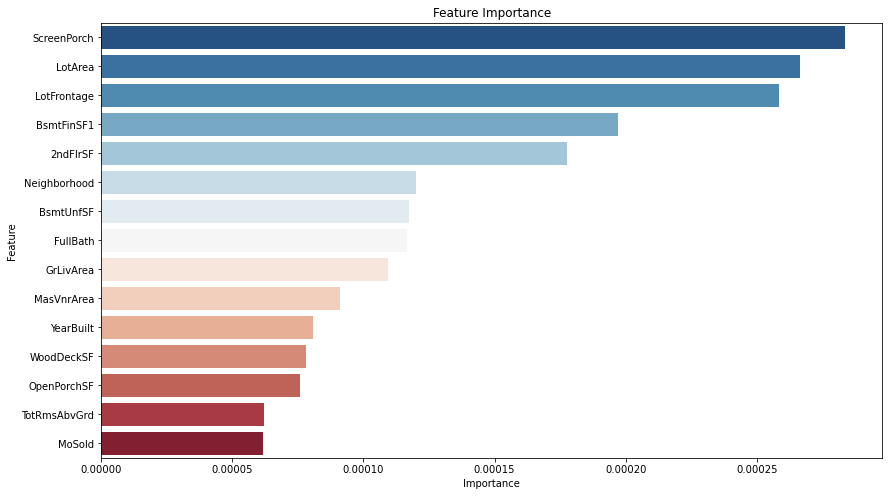

In [64]:
plt.figure(figsize=(14,8))
sns.barplot(x=df_feat.Importance, y=df_feat.Feature, palette="RdBu_r")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

In [124]:
# Random Forest Regression give the best output in terms of Model parameters. So we can use it to predict Housing prices.